In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

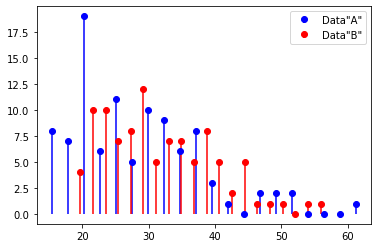

In [2]:
## simulate two distributions

# number of trials
N = 100

# dataset "A"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataA = 26-r*10

# get histogram values for later comparison
yA,xA = np.histogram(dataA,20)
xA = (xA[:-1]+xA[1:])/2

# dataset "B"
r = np.random.randn(N)
r[r>0] = np.log(1+r[r>0])
dataB = 30-r*10

#get histogram values for later comparison
yB,xB = np.histogram(dataB,20)
xB = (xB[:-1]+xB[1:])/2


plt.stem(xA,yA,'b',markerfmt='bo',basefmt=' ',label='Data"A"')
plt.stem(xB,yB,'r',markerfmt='ro',basefmt=' ',label='Data"B"')
plt.legend()
plt.show()

In [3]:
## mix trials together

# concatenate trials
alldata = np.hstack((dataA,dataB))

# condition labels
conds = np.hstack((np.ones(N),2*np.ones(N)))

print(alldata)
print(conds)

[32.17416593 23.50578094 36.37659006 35.88722405 26.48548256 21.9941507
 39.36693108 39.83825182 34.81611544 27.8441017  24.55691716 48.95417774
 34.13190131 23.81262654 25.99113342 28.70115603 17.05300648 47.69334689
 31.81500503 29.88714794 21.21206482 37.77203844 20.5982684  26.14145896
 26.02717981 36.74700189 15.74602189 21.41456927 20.13065131 26.26768499
 24.35192832 35.99189863 24.94328228 19.77207478 37.18417627 20.8422013
 14.20559782 41.66144468 15.23983178 29.61198942 19.66542151 15.90245415
 22.65889705 25.24003234 33.32315937 19.85275254 20.93397189 19.43584067
 19.84595084 36.61333659 36.97622447 31.51134576 17.16344761 29.41612695
 25.84037756 17.17579552 15.310496   20.55103886 30.87517649 21.19122964
 19.91249542 25.51511976 62.49922879 51.34468104 22.2357142  20.80799552
 35.76671592 29.44936695 19.3148491  30.86915916 46.44994933 25.15874691
 16.1464524  21.67499011 39.53457345 37.3345005  28.12878222 51.36941771
 17.8038411  35.77465298 16.26485236 20.5796331  14.2

In [4]:
## generate one null hypothesis scenario

# random permutation
fakeconds = np.random.permutation(N*2)

# shuffled condition labels
fakeconds[fakeconds<N] = 1
fakeconds[fakeconds>1] = 2

print(fakeconds)
print("------------------------------------------------------------------------------")


# these two means should be different.
print([np.mean(alldata[conds==1]), np.mean(alldata[conds==2])])

# should these two be different?
print([np.mean(alldata[fakeconds==1]), np.mean(alldata[fakeconds==2])])


[1 2 2 1 1 2 2 1 2 2 1 1 1 2 2 2 1 1 2 1 1 2 2 1 1 1 2 2 1 1 1 2 2 2 1 1 2
 1 1 2 2 2 1 1 2 2 1 1 2 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 2 2 2 1 2 2 1 2 1
 2 1 2 1 1 1 1 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 1 1 1 2 1 2 1 1 2 1 1 2 2 1
 2 2 2 2 2 2 2 1 1 1 2 1 1 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2 2 1 2 1 2 2 2 2
 2 1 2 1 1 1 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 1 2 1 2 1 2 1 2 2 1 2 2 1 1 2
 1 2 2 2 1 1 2 2 1 1 2 2 2 2 2]
------------------------------------------------------------------------------
[27.99229824363488, 31.69509988718387]
[29.75712791949513, 29.930270211323624]


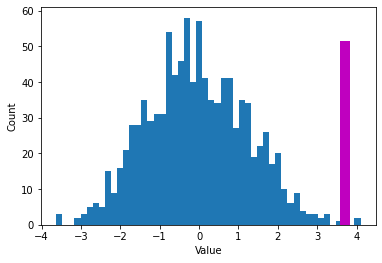

In [5]:
## and now a distribution of null hypothesis values

nPerms = 1000
permdiffs = np.zeros(nPerms)

for permi in range(nPerms):
    fconds = np.random.permutation(N*2)
    fconds[fconds<N] = 1
    fconds[fconds>1] = 2
    permdiffs[permi] = np.mean(alldata[fconds==2]) - np.mean(alldata[fconds==1])


# plot the distribution of H0 values
plt.hist(permdiffs,50)

# and plot the observed value on top
obsval = np.mean(alldata[conds==2]) - np.mean(alldata[conds==1])
plt.plot([obsval, obsval],[0, 50],'m',linewidth=10)
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [6]:
## two methods of evaluating statistical significance

# Z-value
zVal = ( obsval - np.mean(permdiffs) ) / np.std(permdiffs, ddof=1)
p = 1 - stats.norm.cdf(abs(zVal))

# p-value count
pCount = sum(permdiffs > obsval)/nPerms

print(p, pCount)

0.0016418054359337297 0.002
